# Curvy-CUSIPs: UST Basics

In [7]:
import sys
sys.path.append("../")

In [41]:
from CurvyCUSIPs.CurveDataFetcher import CurveDataFetcher
from CurvyCUSIPs.USTs import USTs

from datetime import datetime
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.style.use('ggplot')
params = {'legend.fontsize': 'x-large',
        'figure.figsize': (18, 10),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import os
from dotenv import dotenv_values
env_path = os.path.join(os.getcwd(), "../.env")
config = dotenv_values(env_path)

import nest_asyncio
nest_asyncio.apply()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# FRED_API_KEY not required but more important question is why dont you have a FRED API key if you're interested in rates
curve_data_fetcher = CurveDataFetcher(fred_api_key=config["FRED_API_KEY"])

In [55]:
usts = USTs(
    cusip_set_db_path=r"..\db\ust_cusip_set",
    cusip_timeseries_db_path=r"..\db\ust_cusip_timeseries",
    ct_eod_db_path=r"..\db\ust_eod_ct_yields",
    curve_data_fetcher=curve_data_fetcher,
)

## Fetching Historical Auction Statistics:

In [12]:
usts._historical_auctions_df

,cusip,security_type,auction_date,issue_date,maturity_date,price_per100,allocation_pctage,avg_med_yield,bid_to_cover_ratio,comp_accepted,...,original_security_term,security_term_week_year,primary_dealer_accepted,primary_dealer_tendered,reopening,total_accepted,total_tendered,treas_retail_accepted,treas_retail_tenders_accepted,ust_label
336,912810UE6,Bond,2024-12-12,2024-12-16,2054-11-15,null,null,null,null,null,...,30-Year,29-Year,null,null,Yes,null,null,null,Yes,4.500% Nov-54
338,91282CLW9,Note,2024-12-11,2024-12-16,2034-11-15,null,null,null,null,null,...,10-Year,9-Year,null,null,Yes,null,null,null,Yes,4.250% Nov-34
337,91282CMB4,Note,2024-12-10,2024-12-16,2027-12-15,null,null,null,null,null,...,3-Year,3-Year,null,null,No,null,null,null,Yes,nan% Dec-27
334,912797JR9,CMB,2024-12-10,2024-12-12,2025-01-23,null,null,null,null,null,...,52-Week,0-Week,null,null,Yes,null,null,null,No,nan% Jan-25
335,912797MT1,Bill,2024-12-09,2024-12-12,2025-03-13,null,null,null,null,null,...,26-Week,13-Week,null,null,Yes,null,null,null,Yes,nan% Mar-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,9127935W2,Bill,1980-01-02,1980-01-08,1981-01-02,null,3.000000,null,null,null,...,52-Week,52-Week,null,null,No,4007825000,6329685000,null,null,12.160% Jan-81
2,9127933Y0,Bill,1979-12-28,1980-01-03,1980-04-03,null,21.000000,null,null,null,...,null,13-Week,null,null,Yes,3257440000,5371540000,null,null,12.590% Apr-80
3,9127934U7,Bill,1979-12-28,1980-01-03,1980-07-03,null,94.000000,null,null,null,...,26-Week,26-Week,null,null,No,3348725000,5954350000,null,null,12.800% Jul-80
1,912810CK2,Bond,1979-11-01,1979-11-15,2009-11-15,null,44.000000,10.440000,null,null,...,30-Year,30-Year,null,null,No,2315000000,3594000000,null,null,10.375% Nov-09


## Looking up CUSIPs:

In [26]:
# Using the CME format: f"{coupon}s {datetime.strftime("%m/%d/%Y")}" 
cme_format = usts.cme_ust_label_to_cusip("4 3/4 11/15/2053")
display(cme_format)

{'cusip': '912810TV0',
 'security_type': 'Bond',
 'auction_date': Timestamp('2024-01-11 00:00:00'),
 'issue_date': Timestamp('2024-01-16 00:00:00'),
 'maturity_date': Timestamp('2053-11-15 00:00:00'),
 'price_per100': '108.773246',
 'allocation_pctage': '25.590000',
 'avg_med_yield': '4.160000',
 'bid_to_cover_ratio': '2.370000',
 'comp_accepted': '20966180200',
 'comp_tendered': '49682325000',
 'corpus_cusip': '912803GW7',
 'tint_cusip_1': 'null',
 'currently_outstanding': '45445000000.000000',
 'direct_bidder_accepted': '3712937200',
 'direct_bidder_tendered': '6777200000',
 'est_pub_held_mat_by_type_amt': '91910000000',
 'fima_included': 'Yes',
 'fima_noncomp_accepted': '0',
 'fima_noncomp_tendered': '0',
 'high_discnt_rate': 'null',
 'high_investment_rate': nan,
 'high_price': '108.773246',
 'high_yield': '4.2290',
 'indirect_bidder_accepted': '14209125000',
 'indirect_bidder_tendered': '16007125000',
 'int_rate': 4.75,
 'low_investment_rate': 'null',
 'low_price': 'null',
 'low_di

In [14]:
usts.cusip_to_cme_ust_label("912810TV0")

'4 3/4 11/15/2053'

In [25]:
# Using the "dealer" format: f"{row['int_rate']:.3f}% {row['maturity_date'].strftime('%b-%y')}"
dealer_format = usts.ust_label_to_cusip("4.750% Nov-53")
display(dealer_format)

{'cusip': '912810TV0',
 'security_type': 'Bond',
 'auction_date': Timestamp('2023-11-09 00:00:00'),
 'issue_date': Timestamp('2023-11-15 00:00:00'),
 'maturity_date': Timestamp('2053-11-15 00:00:00'),
 'price_per100': '99.698482',
 'allocation_pctage': '17.970000',
 'avg_med_yield': '4.650000',
 'bid_to_cover_ratio': '2.240000',
 'comp_accepted': '23910420000',
 'comp_tendered': '53578480000',
 'corpus_cusip': '912803GW7',
 'tint_cusip_1': '912834J66',
 'currently_outstanding': 'null',
 'direct_bidder_accepted': '3625500000',
 'direct_bidder_tendered': '6910500000',
 'est_pub_held_mat_by_type_amt': '102174000000',
 'fima_included': 'Yes',
 'fima_noncomp_accepted': '0',
 'fima_noncomp_tendered': '0',
 'high_discnt_rate': 'null',
 'high_investment_rate': nan,
 'high_price': '99.698482',
 'high_yield': '4.7690',
 'indirect_bidder_accepted': '14371980000',
 'indirect_bidder_tendered': '15630980000',
 'int_rate': 4.75,
 'low_investment_rate': 'null',
 'low_price': 'null',
 'low_discnt_margi

In [16]:
usts.cusip_to_ust_label("912810TV0")["ust_label"]

'4.750% Nov-53'

## Fetching CT Yields:

In [46]:
ct_df = usts.fetch_ct_yields(start_date=datetime(2024, 1, 1), end_date=datetime(2024, 12, 1))
ct_df

,CT3M,CT6M,CT1,CT2,CT3,CT5,CT7,CT10,CT20,CT30
Date,,,,,,,,,,
2024-01-02,5.295390,5.177835,4.787577,4.370389,4.100865,3.928581,3.961901,3.944570,4.247731,4.083522
2024-01-03,5.304862,5.187600,4.797913,4.332576,4.077939,3.895921,3.914869,3.906943,4.210063,4.053253
2024-01-04,5.293835,5.186854,4.830198,4.382398,4.145585,3.972914,3.992895,3.989457,4.295486,4.137732
2024-01-05,5.307206,5.180070,4.828254,4.399235,4.178916,4.015292,4.040103,4.049632,4.363723,4.208215
2024-01-08,5.306426,5.168807,4.805679,4.365890,4.121773,3.966166,3.993101,4.011612,4.322542,4.177047
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,4.477939,4.435174,4.394635,4.377849,4.316518,4.301327,4.345449,4.409881,4.707747,4.596384
2024-11-25,4.404584,4.398652,4.337351,4.275555,4.214558,4.194658,4.239662,4.304114,4.598057,4.482679
2024-11-26,4.509389,4.459824,4.385393,4.275668,4.214561,4.173371,4.208064,4.265185,4.567831,4.448571


## Fetching CMT Yields:

In [47]:
cmt_df = curve_data_fetcher.fred_data_fetcher.get_historical_cmt_yields(start_date=datetime(2024, 1, 1), end_date=datetime(2024, 12, 1))
cmt_df

Fetching from FRED...


,CMT3M,CMT6M,CMT1,CMT2,CMT3,CMT5,CMT7,CMT10,CMT20,CMT30
Date,,,,,,,,,,
2024-01-02,5.22,5.04,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
2024-01-03,5.24,5.06,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2024-01-04,5.24,5.06,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
2024-01-05,5.24,5.05,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
2024-01-08,5.25,5.04,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,4.43,4.34,4.42,4.37,4.32,4.30,4.35,4.41,4.67,4.60
2024-11-25,4.42,4.34,4.37,4.21,4.21,4.17,4.21,4.27,4.53,4.45
2024-11-26,4.40,4.32,4.37,4.21,4.21,4.17,4.24,4.30,4.56,4.48


## Plotting Yield Curves:

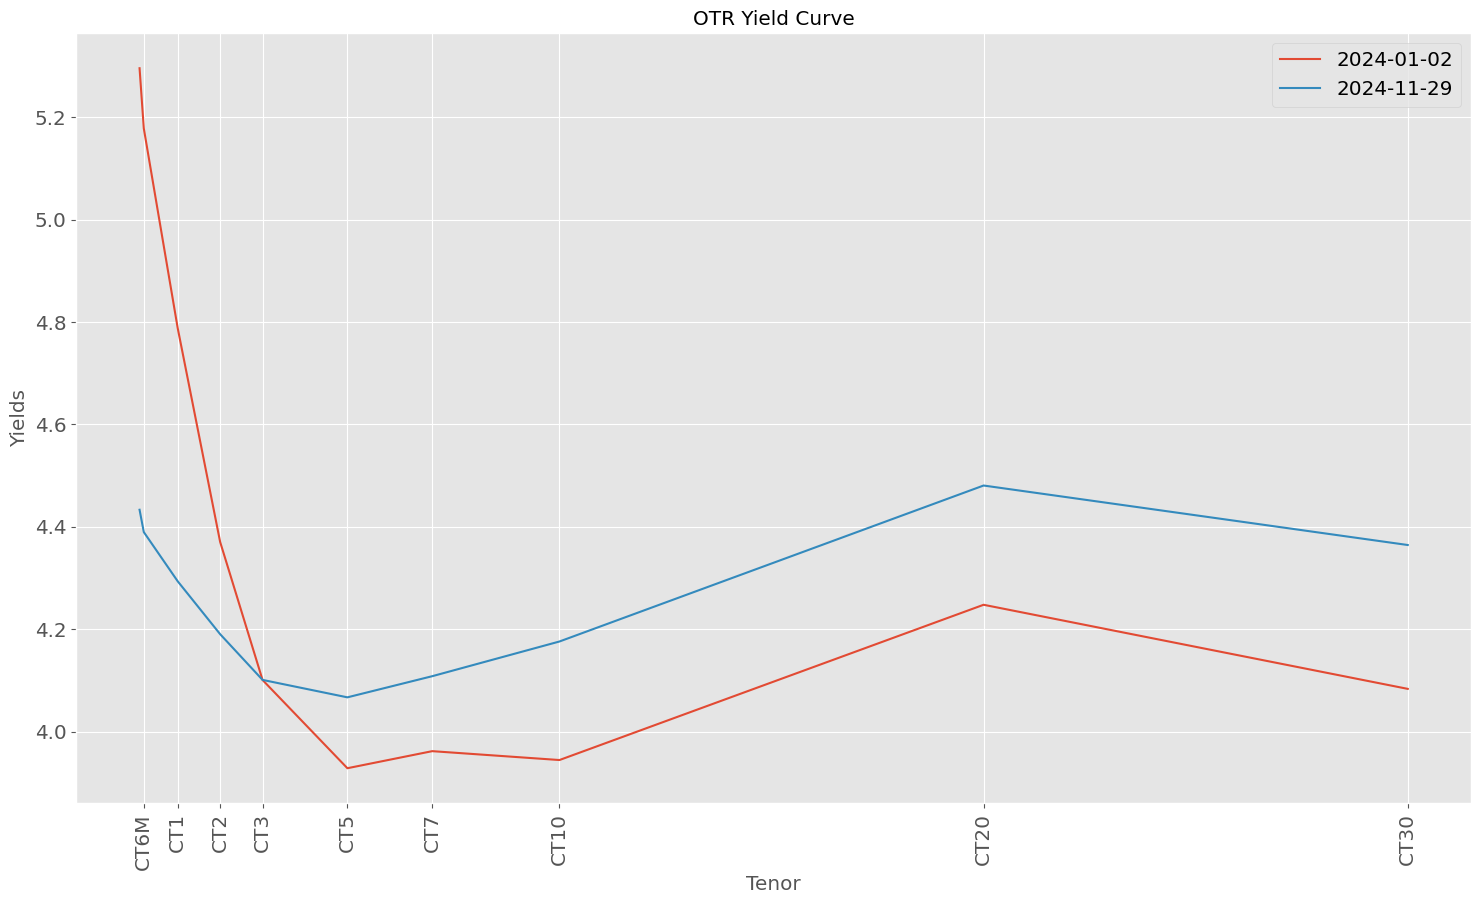

In [48]:
as_of_dates = [datetime(2024, 1, 2), datetime(2024, 11, 29)]

plt.figure()
for curr in as_of_dates:
    try:
        row = ct_df.loc[curr]
        plt.plot([USTs.tenor_to_years(i) for i in row.index], row.values, label=f"{curr.date()}")
    except Exception as e:
        print(f"{curr} NOT IN DB", e)


plt.xlabel("Tenor")
plt.xticks([USTs.tenor_to_years(i) for i in row.index][1:], row.index[1:], rotation='vertical')
plt.ylabel("Yields")
plt.title("OTR Yield Curve")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

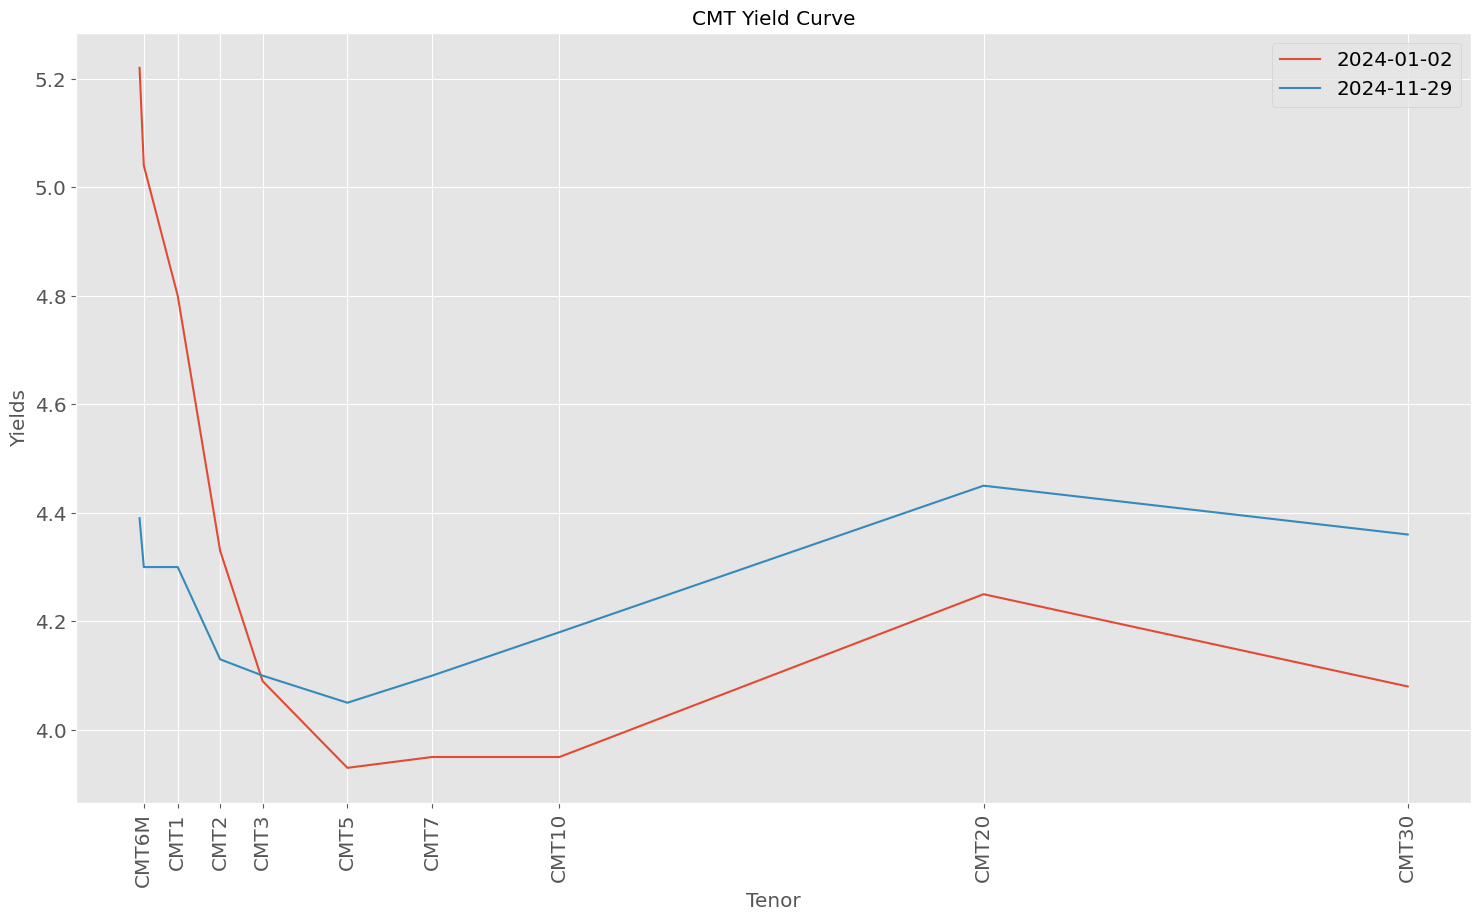

In [49]:
as_of_dates = [datetime(2024, 1, 2), datetime(2024, 11, 29)]

plt.figure()
for curr in as_of_dates:
    try:
        row = cmt_df.loc[curr]
        plt.plot([USTs.tenor_to_years(i) for i in row.index], row.values, label=f"{curr.date()}")
    except Exception as e:
        print(f"{curr} NOT IN DB", e)


plt.xlabel("Tenor")
plt.xticks([USTs.tenor_to_years(i) for i in row.index][1:], row.index[1:], rotation='vertical')
plt.ylabel("Yields")
plt.title("CMT Yield Curve")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

## Plotting Spreads and Flies:

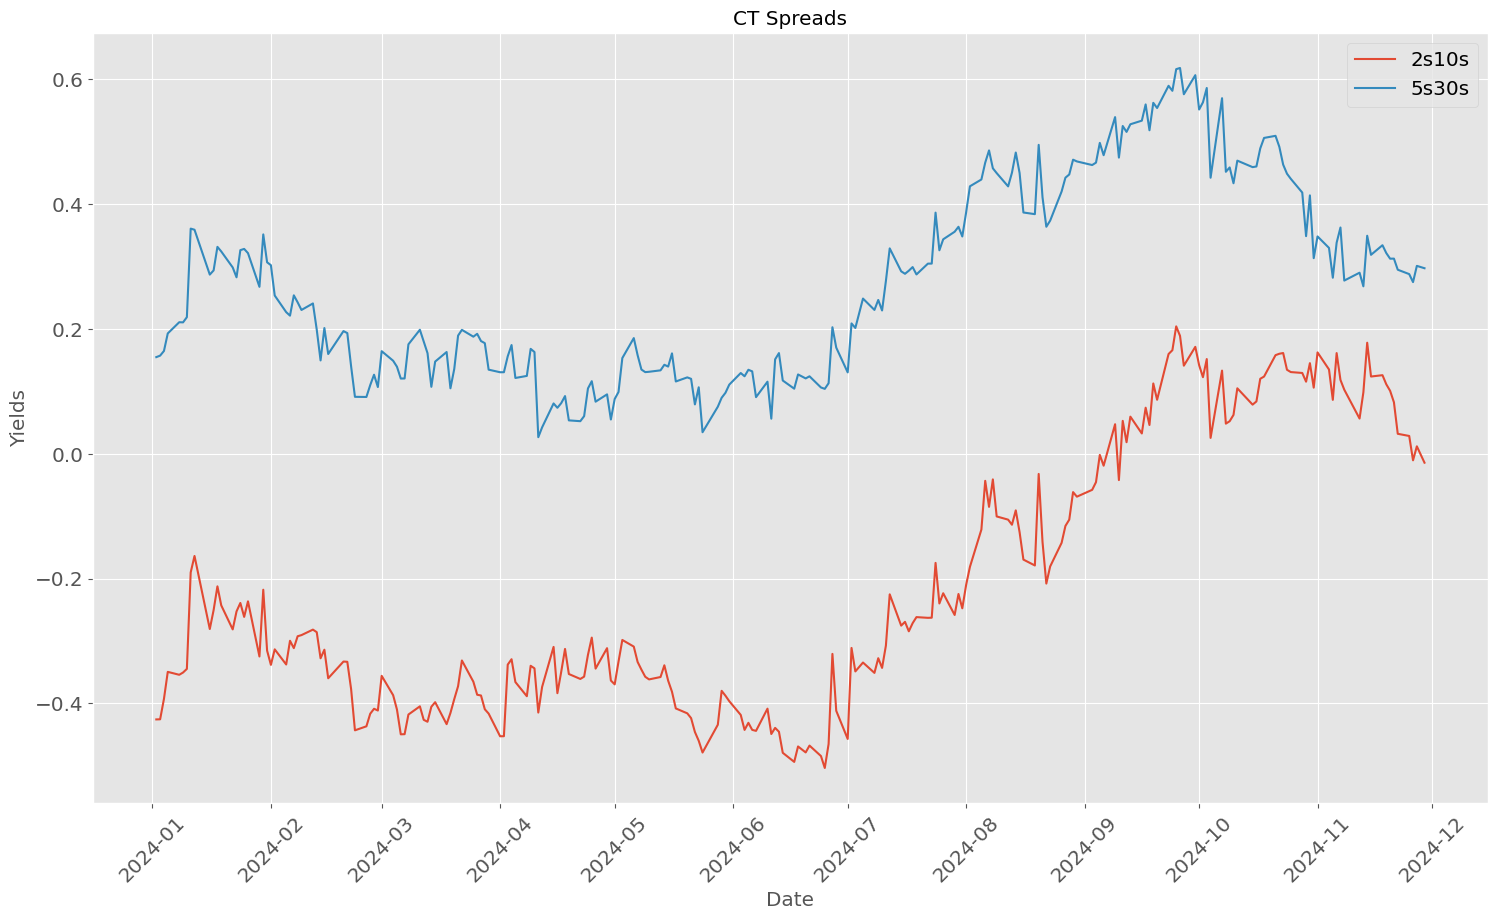

In [50]:
ct_df["2s10s"] = ct_df["CT10"] - ct_df["CT2"]
ct_df["5s30s"] = ct_df["CT30"] - ct_df["CT5"]

plt.plot(ct_df.index, ct_df["2s10s"], label="2s10s")
plt.plot(ct_df.index, ct_df["5s30s"], label="5s30s")

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Yields")
plt.title("CT Spreads")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

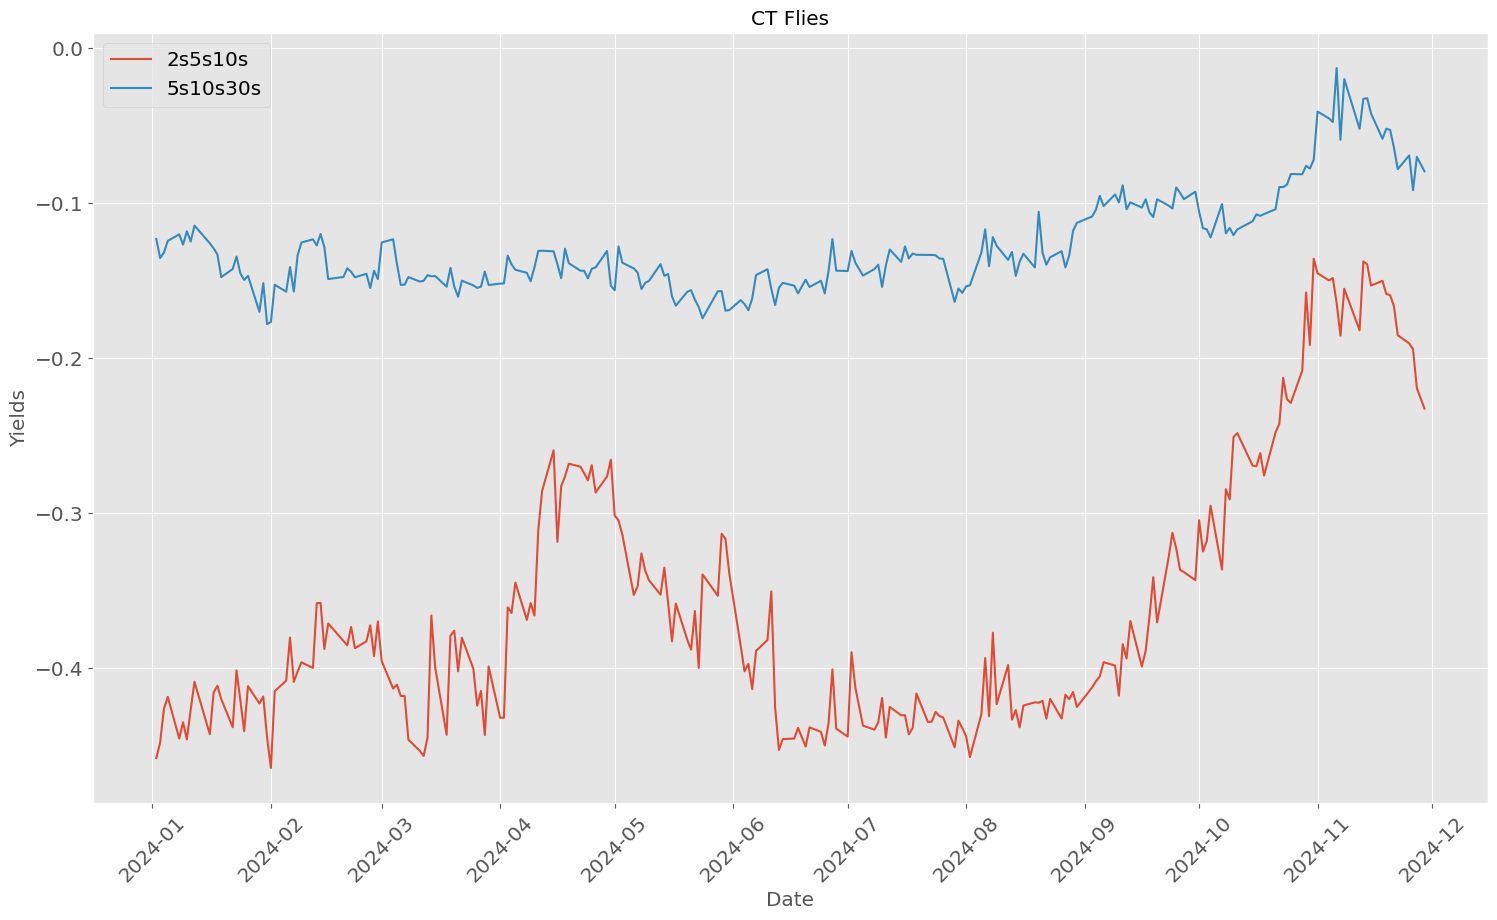

In [51]:
ct_df["2s5s10s"] = (ct_df["CT5"] - ct_df["CT2"]) - (ct_df["CT10"] - ct_df["CT5"])
ct_df["5s10s30s"] = (ct_df["CT10"] - ct_df["CT5"]) - (ct_df["CT30"] - ct_df["CT10"])

plt.plot(ct_df.index, ct_df["2s5s10s"], label="2s5s10s")
plt.plot(ct_df.index, ct_df["5s10s30s"], label="5s10s30s")

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Yields")
plt.title("CT Flies")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

## Fetching CUSIPs:

In [52]:
# CTDs for USH5 and ULH5 

ush5_ctd_cusip = usts.cme_ust_label_to_cusip("4 3/8 5/15/2040")
display(ush5_ctd_cusip)

ulh5_ctd_cusip = usts.cme_ust_label_to_cusip("4 11/15/2052")
display(ulh5_ctd_cusip)

ctd_ts_df = usts.get_ust_timeseries_by_cusips(
    start_date=datetime(2024, 1, 1),
    end_date=datetime(2024, 12, 1),
    cusips=[ush5_ctd_cusip["cusip"], ulh5_ctd_cusip["cusip"]],
    cusip_cols=["eod_yield"],
)
ctd_ts_df

{'cusip': '912810QH4',
 'security_type': 'Bond',
 'auction_date': Timestamp('2010-07-14 00:00:00'),
 'issue_date': Timestamp('2010-07-15 00:00:00'),
 'maturity_date': Timestamp('2040-05-15 00:00:00'),
 'price_per100': '105.053815',
 'allocation_pctage': '39.230000',
 'avg_med_yield': '4.039000',
 'bid_to_cover_ratio': '2.890000',
 'comp_accepted': '12985141500',
 'comp_tendered': '37619800000',
 'corpus_cusip': '912803DM2',
 'tint_cusip_1': 'null',
 'currently_outstanding': '30469000000.000000',
 'direct_bidder_accepted': '2093261500',
 'direct_bidder_tendered': '4795300000',
 'est_pub_held_mat_by_type_amt': '12978000000',
 'fima_included': 'Yes',
 'fima_noncomp_accepted': '0',
 'fima_noncomp_tendered': '0',
 'high_discnt_rate': 'null',
 'high_investment_rate': nan,
 'high_price': '105.053815',
 'high_yield': '4.0800',
 'indirect_bidder_accepted': '4861020100',
 'indirect_bidder_tendered': '8734200000',
 'int_rate': 4.375,
 'low_investment_rate': 'null',
 'low_price': 'null',
 'low_dis

{'cusip': '912810TL2',
 'security_type': 'Bond',
 'auction_date': Timestamp('2023-01-12 00:00:00'),
 'issue_date': Timestamp('2023-01-17 00:00:00'),
 'maturity_date': Timestamp('2052-11-15 00:00:00'),
 'price_per100': '107.556697',
 'allocation_pctage': '50.660000',
 'avg_med_yield': '3.535000',
 'bid_to_cover_ratio': '2.450000',
 'comp_accepted': '17986672000',
 'comp_tendered': '44095910000',
 'corpus_cusip': '912803GM9',
 'tint_cusip_1': 'null',
 'currently_outstanding': '46340000000.000000',
 'direct_bidder_accepted': '2937600000',
 'direct_bidder_tendered': '3497600000',
 'est_pub_held_mat_by_type_amt': '73491000000',
 'fima_included': 'Yes',
 'fima_noncomp_accepted': '0',
 'fima_noncomp_tendered': '0',
 'high_discnt_rate': 'null',
 'high_investment_rate': nan,
 'high_price': '107.556697',
 'high_yield': '3.5850',
 'indirect_bidder_accepted': '13422940000',
 'indirect_bidder_tendered': '16705310000',
 'int_rate': 4.0,
 'low_investment_rate': 'null',
 'low_price': 'null',
 'low_dis

,Date,912810QH4-eod_yield,912810TL2-eod_yield
0,2024-01-02,4.104894,4.118604
1,2024-01-03,4.079011,4.088524
2,2024-01-04,4.167244,4.171761
3,2024-01-05,4.240736,4.241109
4,2024-01-08,4.198558,4.208230
...,...,...,...
225,2024-11-22,4.582210,4.648394
226,2024-11-25,4.459290,4.531012
227,2024-11-26,4.425344,4.499539
228,2024-11-27,4.414052,4.484933


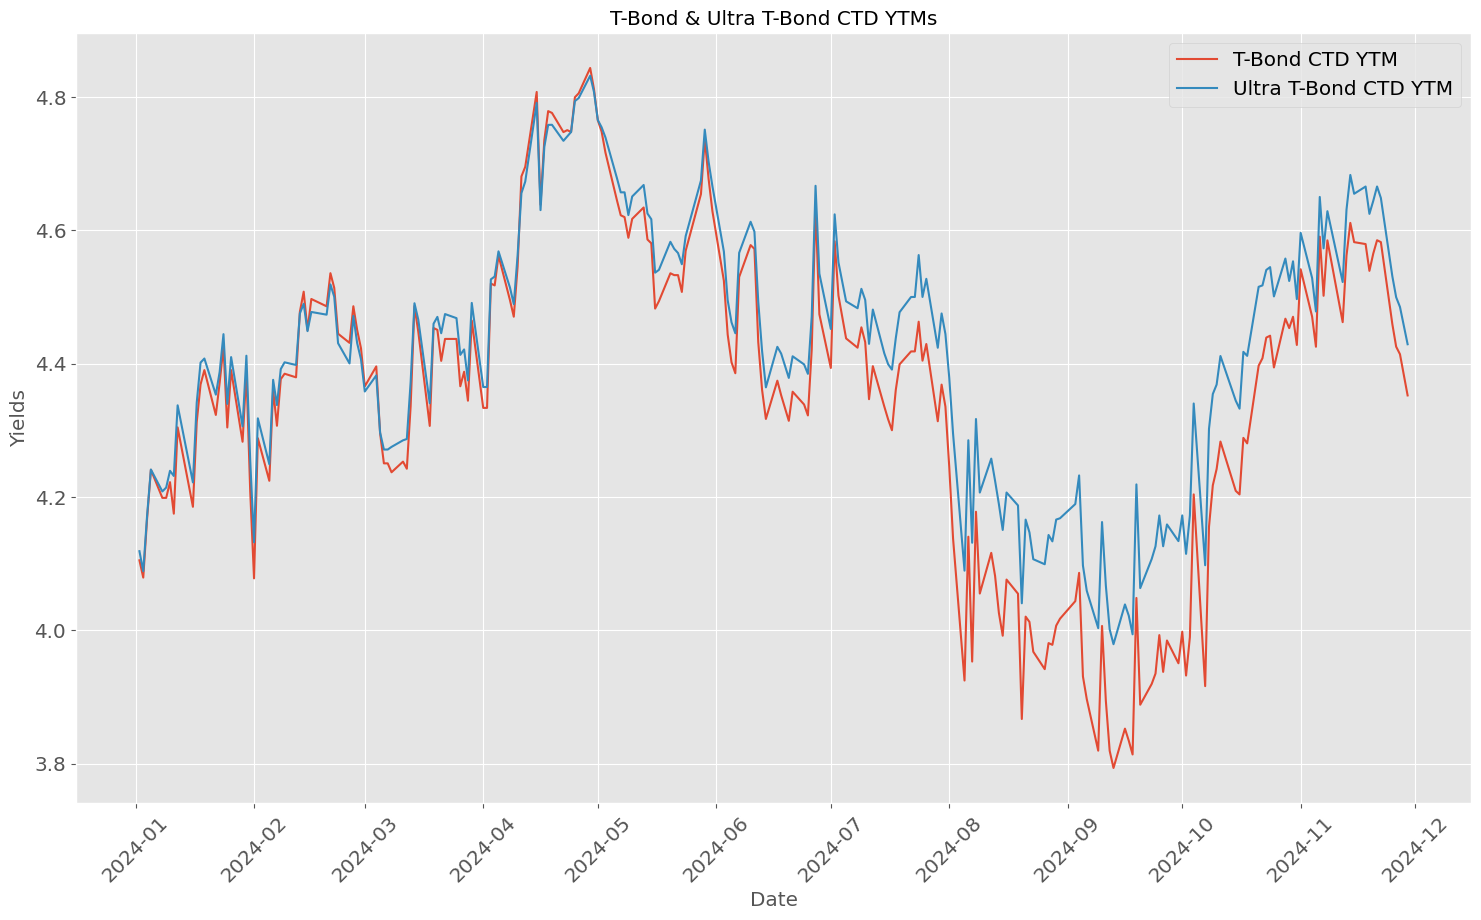

In [53]:
plt.plot(ctd_ts_df["Date"], ctd_ts_df["912810QH4-eod_yield"], label="T-Bond CTD YTM")
plt.plot(ctd_ts_df["Date"], ctd_ts_df["912810TL2-eod_yield"], label="Ultra T-Bond CTD YTM")

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Yields")
plt.title("T-Bond & Ultra T-Bond CTD YTMs")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()

### Futures 2s10s vs CT 2s10s
- The spread of TU CTD and TN CTD is a rough approximation for ytm conversion
- TUH5 CTD is the 4 3/8 Dec 26s
- TNH5 CTD is the 3 7/8	Aug 34s (issued 8/15/2024)

{'cusip': '912810QH4',
 'security_type': 'Bond',
 'auction_date': Timestamp('2010-07-14 00:00:00'),
 'issue_date': Timestamp('2010-07-15 00:00:00'),
 'maturity_date': Timestamp('2040-05-15 00:00:00'),
 'price_per100': '105.053815',
 'allocation_pctage': '39.230000',
 'avg_med_yield': '4.039000',
 'bid_to_cover_ratio': '2.890000',
 'comp_accepted': '12985141500',
 'comp_tendered': '37619800000',
 'corpus_cusip': '912803DM2',
 'tint_cusip_1': 'null',
 'currently_outstanding': '30469000000.000000',
 'direct_bidder_accepted': '2093261500',
 'direct_bidder_tendered': '4795300000',
 'est_pub_held_mat_by_type_amt': '12978000000',
 'fima_included': 'Yes',
 'fima_noncomp_accepted': '0',
 'fima_noncomp_tendered': '0',
 'high_discnt_rate': 'null',
 'high_investment_rate': nan,
 'high_price': '105.053815',
 'high_yield': '4.0800',
 'indirect_bidder_accepted': '4861020100',
 'indirect_bidder_tendered': '8734200000',
 'int_rate': 4.375,
 'low_investment_rate': 'null',
 'low_price': 'null',
 'low_dis

{'cusip': '912810TL2',
 'security_type': 'Bond',
 'auction_date': Timestamp('2023-01-12 00:00:00'),
 'issue_date': Timestamp('2023-01-17 00:00:00'),
 'maturity_date': Timestamp('2052-11-15 00:00:00'),
 'price_per100': '107.556697',
 'allocation_pctage': '50.660000',
 'avg_med_yield': '3.535000',
 'bid_to_cover_ratio': '2.450000',
 'comp_accepted': '17986672000',
 'comp_tendered': '44095910000',
 'corpus_cusip': '912803GM9',
 'tint_cusip_1': 'null',
 'currently_outstanding': '46340000000.000000',
 'direct_bidder_accepted': '2937600000',
 'direct_bidder_tendered': '3497600000',
 'est_pub_held_mat_by_type_amt': '73491000000',
 'fima_included': 'Yes',
 'fima_noncomp_accepted': '0',
 'fima_noncomp_tendered': '0',
 'high_discnt_rate': 'null',
 'high_investment_rate': nan,
 'high_price': '107.556697',
 'high_yield': '3.5850',
 'indirect_bidder_accepted': '13422940000',
 'indirect_bidder_tendered': '16705310000',
 'int_rate': 4.0,
 'low_investment_rate': 'null',
 'low_price': 'null',
 'low_dis

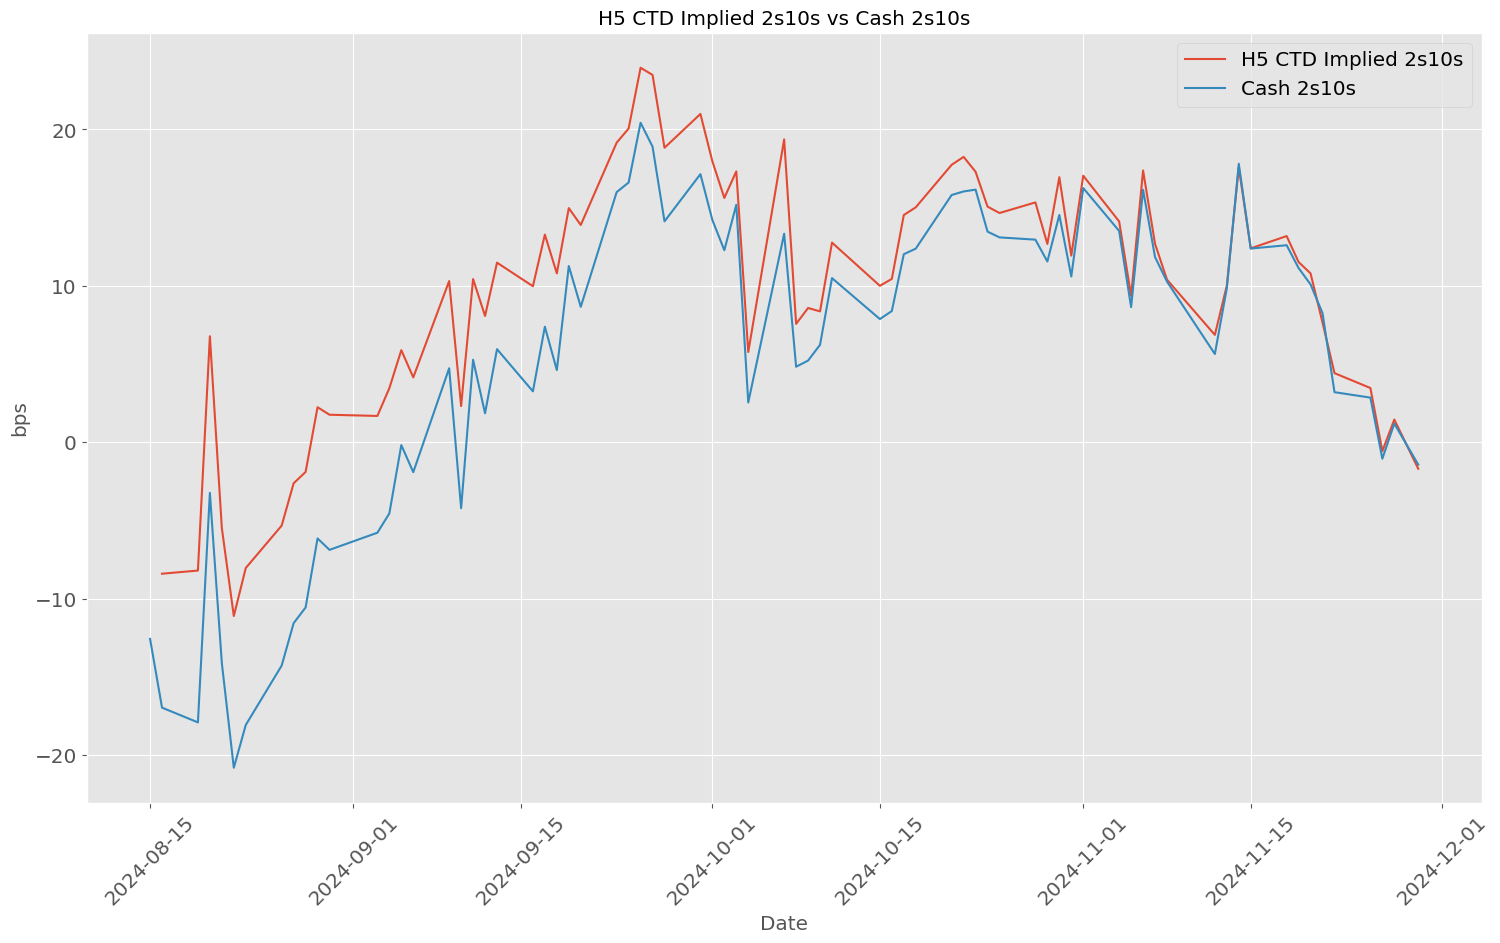

In [54]:
tuh5_ctd_cusip = usts.cme_ust_label_to_cusip("4 3/8 12/15/2026")
display(ush5_ctd_cusip)

tnh5_ctd_cusip = usts.cme_ust_label_to_cusip("3 7/8 8/15/2034")
display(ulh5_ctd_cusip)

start = datetime(2024, 8, 15)
end = datetime(2024, 12, 1)

ctd_ts_df = usts.get_ust_timeseries_by_cusips(
    start_date=start,
    end_date=end,
    cusips=[tuh5_ctd_cusip["cusip"], tnh5_ctd_cusip["cusip"]],
    cusip_cols=["eod_yield"],
)

ct_filtered_df = ct_df[(ct_df.index >= start) & (ct_df.index <= end)]

plt.plot(
    ctd_ts_df["Date"],
    (ctd_ts_df[f"{tnh5_ctd_cusip["cusip"]}-eod_yield"] - ctd_ts_df[f"{tuh5_ctd_cusip["cusip"]}-eod_yield"]) * 100,
    label="H5 CTD Implied 2s10s",
)
plt.plot(ct_filtered_df.index, ct_filtered_df["2s10s"] * 100, label="Cash 2s10s")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("bps")
plt.title("H5 CTD Implied 2s10s vs Cash 2s10s")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()